# Classification model using Convolution neural network
###  - cnn model with dropout layer  

In [1]:
import cv2
from os import listdir
import numpy as np

from numpy import save

In [2]:
#load images and labels array

In [3]:
images=np.load('dogs_vs_cats_photos3.npy')
labels=np.load('dogs_vs_cats_labels3.npy')

In [4]:
#import train_test_split function to divide data into train and test part
from sklearn.model_selection import train_test_split

In [5]:
# divide 90% of data into train part and 10% into test part
x_train,x_test, y_train,y_test=train_test_split(images, labels,test_size=0.1, random_state=4)

In [6]:
#shapes of data
print("train_data_images_shape:",x_train.shape)
print("test_data_images_shape:",x_test.shape)
print("train_data_labels_shape:",y_train.shape)
print("test_data_labels_shape:",y_test.shape)


train_data_images_shape: (9000, 100, 100, 3)
test_data_images_shape: (1000, 100, 100, 3)
train_data_labels_shape: (9000,)
test_data_labels_shape: (1000,)


In [7]:
x_train= x_train.astype("float")/255.0
x_test=x_test.astype("float")/255.0

In [8]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense, Dropout

Using TensorFlow backend.


In [10]:
#Initialize the keras model
model = Sequential()
model.add(Conv2D(nb_filter=32,nb_row=3,nb_col=3,input_shape = (100,100,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(nb_filter=64,nb_row=3,nb_col=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(nb_filter=128,nb_row=3,nb_col=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\shilp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(input_shape=(100, 100,..., kernel_size=(3, 3), filters=32)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shilp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", kernel_size=(3, 3), filters=64)`
  
C:\Users\shilp\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", kernel_size=(3, 3), filters=128)`
  if sys.path[0] == '':


In [12]:
#Compiling the model with cross entropy loss and Adadelta optimizer
import keras
model.compile(loss="binary_crossentropy",optimizer=keras.optimizers.Adam(lr=0.001),metrics=['accuracy'])

In [13]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
activation_2 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 23, 23, 64)        0         
__________

In [15]:
batch_size = 200
epochs = 25
#Actual training the model
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0 .2)

Train on 7200 samples, validate on 1800 samples
Epoch 1/25
7200/7200 [==============================] - 115s 16ms/step - loss: 0.6977 - acc: 0.4950 - val_loss: 0.6908 - val_acc: 0.5022
Epoch 2/25
7200/7200 [==============================] - 114s 16ms/step - loss: 0.6920 - acc: 0.5244 - val_loss: 0.6903 - val_acc: 0.5861
Epoch 3/25
7200/7200 [==============================] - 114s 16ms/step - loss: 0.6795 - acc: 0.5589 - val_loss: 0.6664 - val_acc: 0.5933
Epoch 4/25
7200/7200 [==============================] - 116s 16ms/step - loss: 0.6501 - acc: 0.6049 - val_loss: 0.6362 - val_acc: 0.6061
Epoch 5/25
7200/7200 [==============================] - 115s 16ms/step - loss: 0.6103 - acc: 0.6551 - val_loss: 0.5888 - val_acc: 0.6722
Epoch 6/25
7200/7200 [==============================] - 113s 16ms/step - loss: 0.5722 - acc: 0.6936 - val_loss: 0.5437 - val_acc: 0.7200
Epoch 7/25
7200/7200 [==============================] - 115s 16ms/step - loss: 0.5402 - acc: 0.7260 - val_loss: 0.5215 - val_acc: 

In [16]:
#to check precision
score = model.evaluate(x_test,y_test)
print("LOSS:")
print(score[0])
print("precision:")         
print(score[1])

1000/1000 [==============================] - 5s 5ms/step
LOSS:
0.5578986740112305
precision:
0.795


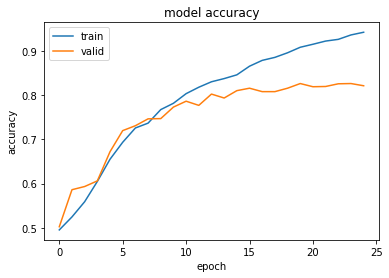

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
#model accuracy increase in thisc model